# **Chaos and Lyapunov Exponent Project**

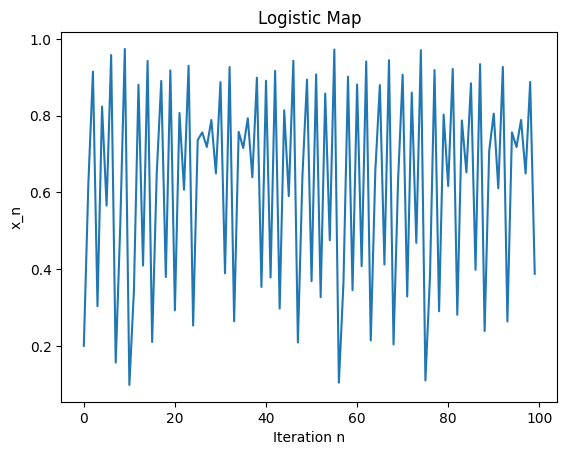

In [ ]:
# We are first building a logistic map, a map governed by the equation x_n+1 = rx_n(1-x_n)

import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x0, n):
    x = np.zeros(N)
    x[0] = x0
    for n in range(N-1):
      x[n+1] = r * x[n] * (1-x[n])
    return x

# Parameters
x0 = 0.2
r = 3.9
N = 100

x = logistic_map(r, x0, N)

plt.plot(x)
plt.xlabel('Iteration n')
plt.ylabel('x_n')
plt.title('Logistic Map')
plt.show()

# rx(1-x)

# Running the code with r = 2.5 shows that x_n settles to a value, however with r = 3.2 it oscillates about two values. With 3.9 it varies totally randomly.

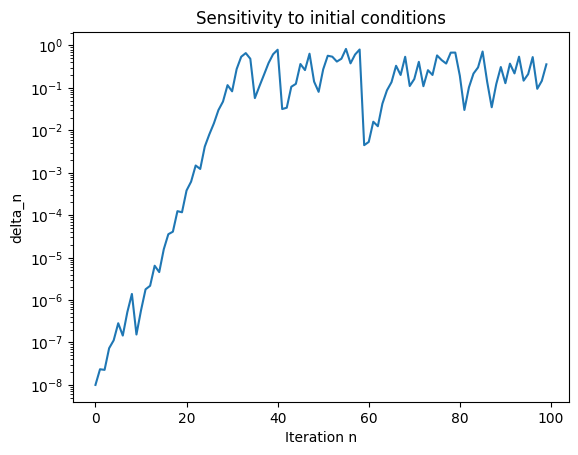

In [ ]:
x = logistic_map(r, x0, N)

delta0 = 1e-8

x_tilde = logistic_map(r, x0 + delta0, N)

delta = np.abs(x_tilde - x)

plt.semilogy(delta)
plt.xlabel('Iteration n')
plt.ylabel('delta_n')
plt.title('Sensitivity to initial conditions')
plt.show()

In [ ]:
def lyapunov_logistic(r, x=0.02, N=20000, burn=1000):
    x = x0
    s = 0.0
    count = 0

    for n in range(N + burn):
        x = r * x * (1 - x)

        if n >= burn:
            deriv = abs(r * (1 - 2 * x))
            deriv = max(deriv, 1e-300)  # safety
            s += np.log(deriv)
            count += 1

    return s / count

for r in [2.5, 3.2, 3.5, 3.9]:
    lam = lyapunov_logistic(r)
    print(f"r={r:.1f}  lambda≈{lam:.4f}")

r=2.5  lambda≈-0.6931
r=3.2  lambda≈-0.9163
r=3.5  lambda≈-0.8725
r=3.9  lambda≈0.4983


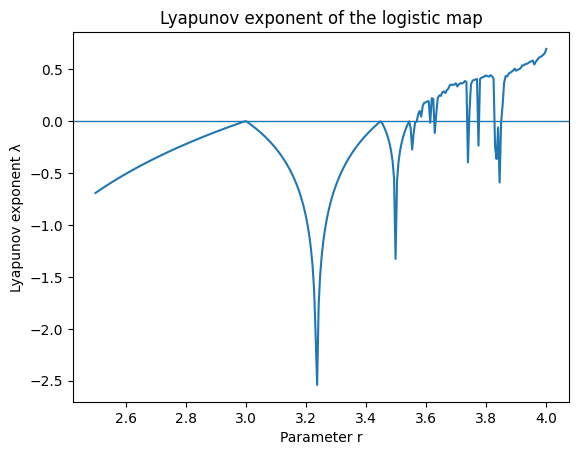

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lyapunov_logistic(r, x0=0.2, N=20000, burn=1000):
    x = x0
    s = 0.0
    count = 0

    for n in range(N + burn):
        x = r * x * (1 - x)

        if n >= burn:
            deriv = abs(r * (1 - 2 * x))
            deriv = max(deriv, 1e-300)
            s += np.log(deriv)
            count += 1

    return s / count

rs = np.linspace(2.5, 4.0, 300)
lambdas = [lyapunov_logistic(r) for r in rs]

plt.plot(rs, lambdas)
plt.axhline(0, linewidth=1)
plt.xlabel("Parameter r")
plt.ylabel("Lyapunov exponent λ")
plt.title("Lyapunov exponent of the logistic map")
plt.show()
